In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from typing import List, Tuple

import pathlib
import datetime
import time
AUTOTUNE = tf.data.AUTOTUNE

from tf_augmentation import ds_augment

In [2]:
data_dir = pathlib.Path("C:/Users/AORUS/dataset")

In [3]:
REPEAT_TIMES = 20
SHUFFLE_BUFFER = 1000
BATCH_SIZE = 64
IMG_SIZE = 96
EPOCHS = 10

In [4]:
train_ds : tf.data.Dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
)
val_ds : tf.data.Dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(IMG_SIZE, IMG_SIZE),
)
class_names = train_ds.class_names
num_classes = len(class_names)
print(class_names)
print(f"num: {num_classes}")
train_ds_ = train_ds.cache(str(data_dir / "train_ds")).unbatch().repeat(REPEAT_TIMES).shuffle(SHUFFLE_BUFFER, reshuffle_each_iteration=True)
val_ds_ = val_ds.cache(str(data_dir / "val_ds")).unbatch().repeat(max(1, REPEAT_TIMES // 4)).shuffle(SHUFFLE_BUFFER, reshuffle_each_iteration=True)

train_ds = ds_augment(train_ds_).batch(BATCH_SIZE, num_parallel_calls=AUTOTUNE).prefetch(AUTOTUNE)
val_ds = ds_augment(val_ds_).batch(BATCH_SIZE, num_parallel_calls=AUTOTUNE).prefetch(AUTOTUNE)

Found 2369 files belonging to 15 classes.
Found 2369 files belonging to 15 classes.
['apple', 'banana', 'bus', 'car', 'cat', 'cow', 'dog', 'durian', 'grape', 'horse', 'orange', 'pig', 'plane', 'ship', 'train']
num: 15


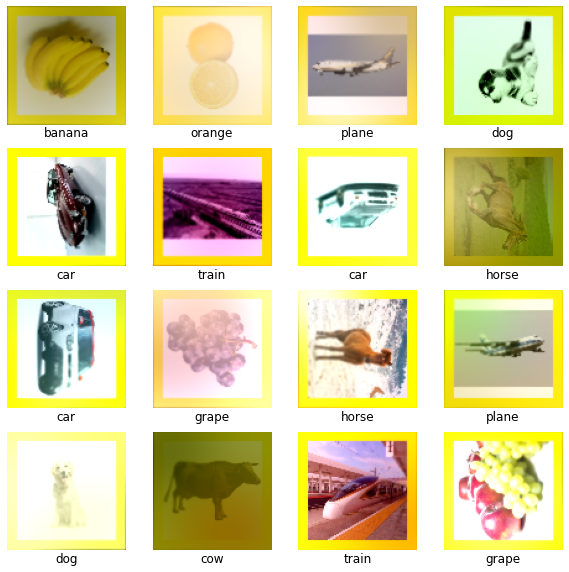

In [5]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i] / 255)
        plt.title(class_names[labels[i]], y=-0.15)
        plt.axis("off")

In [6]:
# model = tf.keras.applications.MobileNetV3Small(
model = tf.keras.applications.MobileNetV3Large(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=True,
    weights=None,
    classes=num_classes,
)

# model = tf.keras.applications.efficientnet_v2.EfficientNetV2S(
# model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
#     input_shape=(IMG_SIZE, IMG_SIZE, 3),
#     include_top=True,
#     weights=None,
#     classes=num_classes,
# )

# def get_model():
#     i = tf.keras.layers.Input([IMG_SIZE, IMG_SIZE, 3], dtype = tf.float32)
#     # x = tf.cast(i, tf.float32)
#     x = tf.keras.applications.inception_v3.preprocess_input(i)
#     core = tf.keras.applications.inception_v3.InceptionV3(
#         weights=None,
#         input_shape=(IMG_SIZE, IMG_SIZE, 3),
#         classes=num_classes,
#     )
#     x = core(x)
#     return tf.keras.Model(inputs=[i], outputs=[x])

# model = get_model()

model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
model.summary()

Model: "MobilenetV3large"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 96, 96, 3)    0           ['input_1[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 48, 48, 16)   432         ['rescaling[0][0]']              
                                                                                                  
 Conv/BatchNorm (BatchNormaliza  (None, 48, 48, 16)  64          ['Conv[0][0]']                   
 tion)                                                                             

In [12]:
history = model.fit(
    train_ds,
    # initial_epoch=5,
    epochs=EPOCHS,
    validation_data=val_ds,
)

Epoch 6/10
741/741 [==============================] - 108s 145ms/step - loss: 0.2535 - accuracy: 0.9165 - val_loss: 1.5823 - val_accuracy: 0.5810
Epoch 7/10
741/741 [==============================] - 109s 147ms/step - loss: 0.2162 - accuracy: 0.9294 - val_loss: 0.3054 - val_accuracy: 0.9058
Epoch 8/10
741/741 [==============================] - 109s 147ms/step - loss: 0.1626 - accuracy: 0.9460 - val_loss: 0.3834 - val_accuracy: 0.9149
Epoch 9/10
741/741 [==============================] - 109s 147ms/step - loss: 0.1569 - accuracy: 0.9490 - val_loss: 0.2418 - val_accuracy: 0.9385
Epoch 10/10
741/741 [==============================] - 110s 148ms/step - loss: 0.1355 - accuracy: 0.9562 - val_loss: 0.4047 - val_accuracy: 0.9054


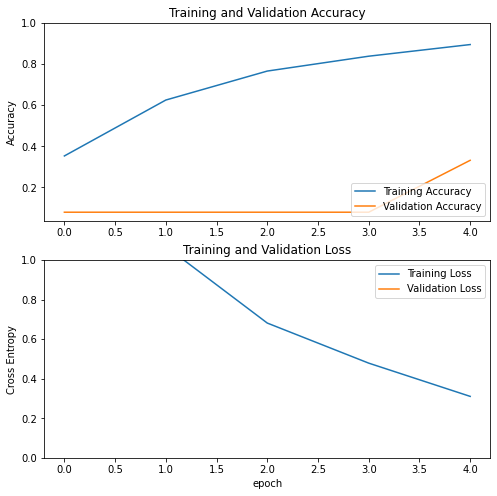

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [13]:
export_path = f"D:/SmartCar/TFLite_Smartcar/saved_models/{int(time.time())}"
model.save(export_path)
print(export_path)

INFO:tensorflow:Assets written to: D:/SmartCar/TFLite_Smartcar/saved_models/1644151049\assets
D:/SmartCar/TFLite_Smartcar/saved_models/1644151049
